In [1]:
from pyparsing import match_previous_literal

from empir19nrm02.MC import generate_base_functions
import pandas as pd
import numpy as np
from empir19nrm02.tools import sumMC
import luxpy as lx
from luxpy import _CIE_ILLUMINANTS
from matplotlib import pyplot as plt

E:\TTBV\Python\luxpy\luxpy\spectrum\basics\illuminants.py:512: RankWarning: Polyfit may be poorly conditioned
  xy, pxy, pxT_l7, pxT_L7, l7, L7 = _get_daylightlocus_parameters(ccts, spds, cieobs_)


In [2]:
elements2Run = [0,1,2,3,4,5,6,7,8,9,10,20,30,40,47, 50,60,70,80,90,100,150,200,235]

trials = 20000

# wavelength scale for further use (same scale as in the abstract/matlab code)
wl = lx.getwlr((360,830,5))

out_dir = 'CIEWienColour'

In [3]:
def colour_calculation( tmp_data, cieobs='1931_2'):
    xyz = lx.spd_to_xyz(tmp_data, cieobs=cieobs)
    Yxy = lx.xyz_to_Yxy(xyz)
    return Yxy[:,1].squeeze(), Yxy[:,2].squeeze()

def FourierTableColour( trials, wl, SD, uSD, mode = 'f', single = ' '):
    wl_elements = wl.shape[0]
    print( wl_elements)
    dataTable = pd.DataFrame()
    rMatrixSD = np.zeros((trials, wl.shape[0]))
    for i, numberNew in enumerate(elements2Run):
        for j in range(trials):
            rMatrix=generate_base_functions( mode + ' ' + str(numberNew) + ' o' + single, wl_elements, uSD)
            rMatrixSD[j] = (1+rMatrix)*SD
        tmp_data =np.vstack(( wl, rMatrixSD))
        x, y = colour_calculation( tmp_data, cieobs='1931_2')

        [x_values, x_interval] = sumMC(x, Coverage=0.95)
        [y_values, y_interval] = sumMC(y, Coverage=0.95)
        xy_corr = np.corrcoef(x, y)
        df = pd.DataFrame( { \
            'N': [numberNew], \
            'x': x_values[0], 'x_std': x_values[1], 'x_95%': (x_interval[1]-x_interval[0])/2., \
            'y': y_values[0], 'y_std': y_values[1], 'y_95%': (y_interval[1]-y_interval[0])/2., \
            'corr': xy_corr[0,1], \
             } , dtype = 'float')

        dataTable = pd.concat( [dataTable, df])
        print( numberNew, end=' ')
    return dataTable

95
0 1 2 3 4 5 6 7 8 9 10 20 30 40 47 50 60 70 80 90 100 150 200 235 

,N,x,x_std,x_95%,y,y_std,y_95%,corr
0,0.0,0.447573,1.970067e-16,8.326673e-17,0.407440,4.541070e-17,8.326673e-17,-0.795259
0,1.0,0.447573,4.088918e-04,8.786271e-04,0.407439,2.073238e-04,4.459665e-04,0.787412
0,2.0,0.447568,8.514616e-04,1.836992e-03,0.407438,4.201573e-04,8.944596e-04,0.624382
0,3.0,0.447574,7.693928e-04,1.612478e-03,0.407442,4.339740e-04,9.235125e-04,0.280173
0,4.0,0.447568,6.700630e-04,1.433057e-03,0.407436,4.816048e-04,1.028881e-03,0.121812
0,5.0,0.447561,6.338761e-04,1.358604e-03,0.407439,4.436160e-04,9.445989e-04,0.124764
0,6.0,0.447567,6.190857e-04,1.321624e-03,0.407439,3.956873e-04,8.458958e-04,0.202769
0,7.0,0.447578,6.072044e-04,1.288727e-03,0.407436,3.776072e-04,8.087034e-04,0.228986
0,8.0,0.447568,6.046455e-04,1.306024e-03,0.407439,3.707791e-04,7.878573e-04,0.226048
0,9.0,0.447574,5.823883e-04,1.241069e-03,0.407436,3.660723e-04,7.877378e-04,0.236371


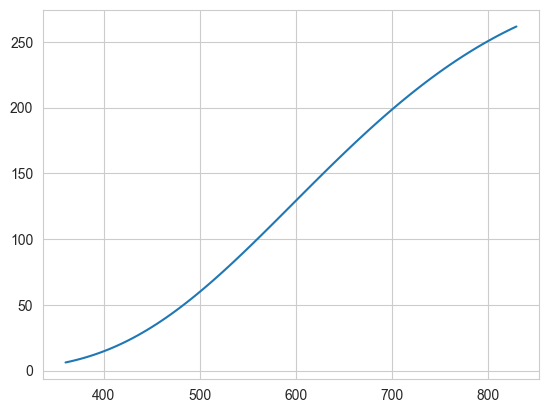

In [4]:
IllA = _CIE_ILLUMINANTS['A'].copy()

IllA5nm = lx.cie_interp(IllA, wl, kind='S')

plt.plot(wl, IllA5nm[1])

dataTableColour=FourierTableColour(trials, wl, IllA5nm[1], 0.01, mode = 'c', single='1f')
#dataTableColour=FourierTableColour(trials, wl, IllA5nm[1], 0.01, mode = 'c', single=' ')
dataTableColour.to_excel(out_dir + '/' +  'FourierColour.xlsx')
dataTableColour

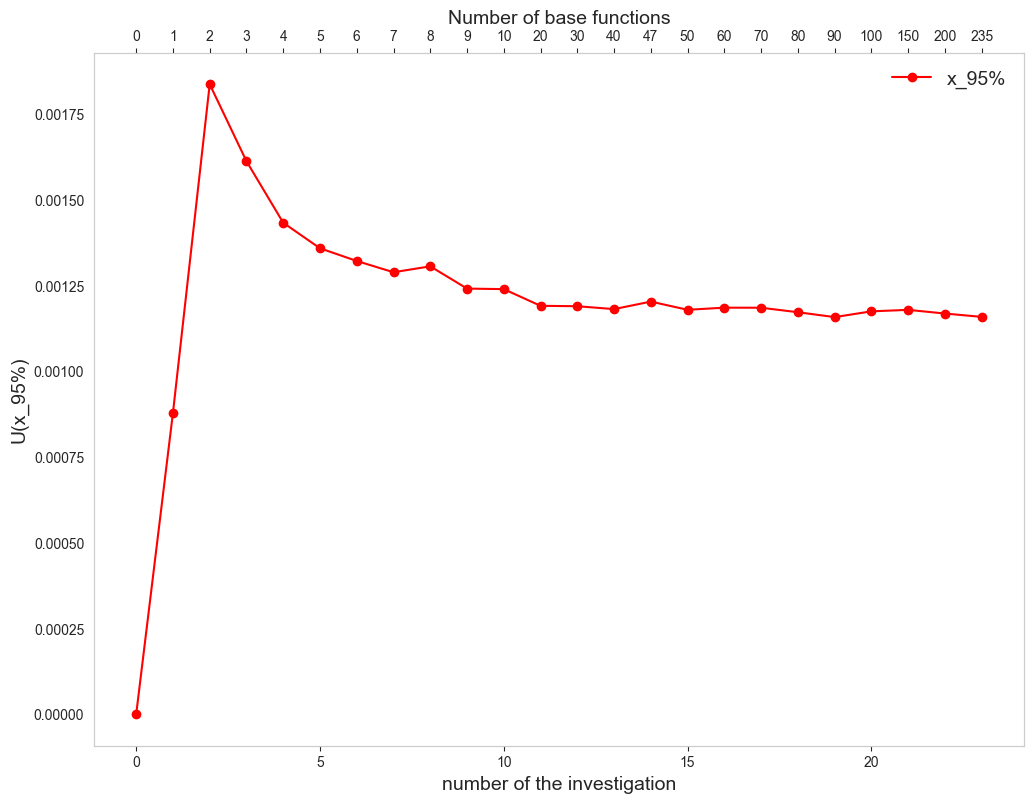

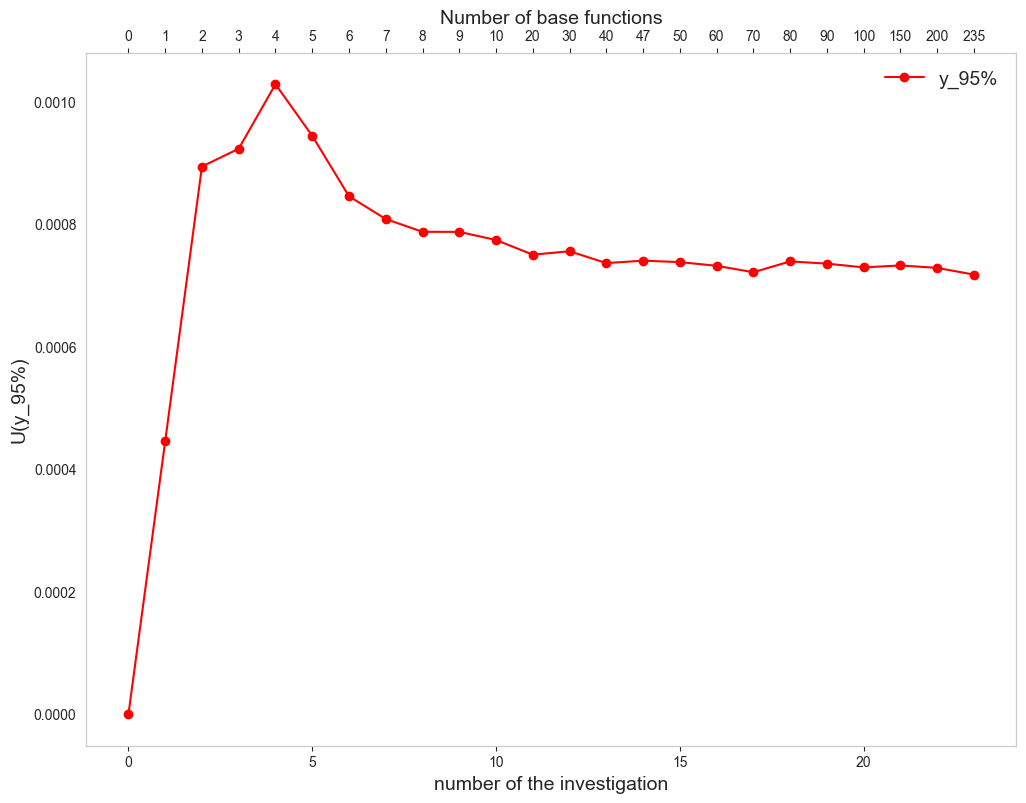

In [5]:
from empir19nrm02.tools.help import strd, label_font_size, plot_cmf2, save_fig, get_target, label_management, \
    quantil, display_responsivity

def graphTest(_dataTableSMCF, _name, _source=None):
    lines =_dataTableSMCF.shape[0]
    eval=np.zeros((lines, 5))
    eval[:,0]=_dataTableSMCF["N"].to_numpy().T
    eval[:,1]=_dataTableSMCF[_source].to_numpy().T
    xNumber = range(lines)
    fig = plt.figure(figsize=(12,9))
    ax1 = fig.add_subplot(111)
    ax2 = ax1.twiny()
    ax1.set_xlabel(r"number of the investigation",fontsize=label_font_size)
    ax1.set_ylabel('U(' + _source + ')',fontsize=label_font_size)
    ax1.plot(xNumber, eval[:,1], 'r-o', label=_source)
    new_tick_locations = range( lines)
    def tick_function(X):
        return ["%d" % elements2Run[z] for z in X]
    ax2.set_xlim(ax1.get_xlim())
    ax2.set_xticks(new_tick_locations)
    ax2.set_xticklabels(tick_function(new_tick_locations))
    ax2.set_xlabel(r"Number of base functions",fontsize=label_font_size)
    ax1.legend(frameon=False, fontsize=label_font_size)
    ax1.grid(visible=False)
    ax2.grid(visible=False)
    save_fig(out_dir, _name)

graphTest(dataTableColour, 'x_Table', _source='x_95%')
graphTest(dataTableColour, 'y_Table', _source='y_95%')


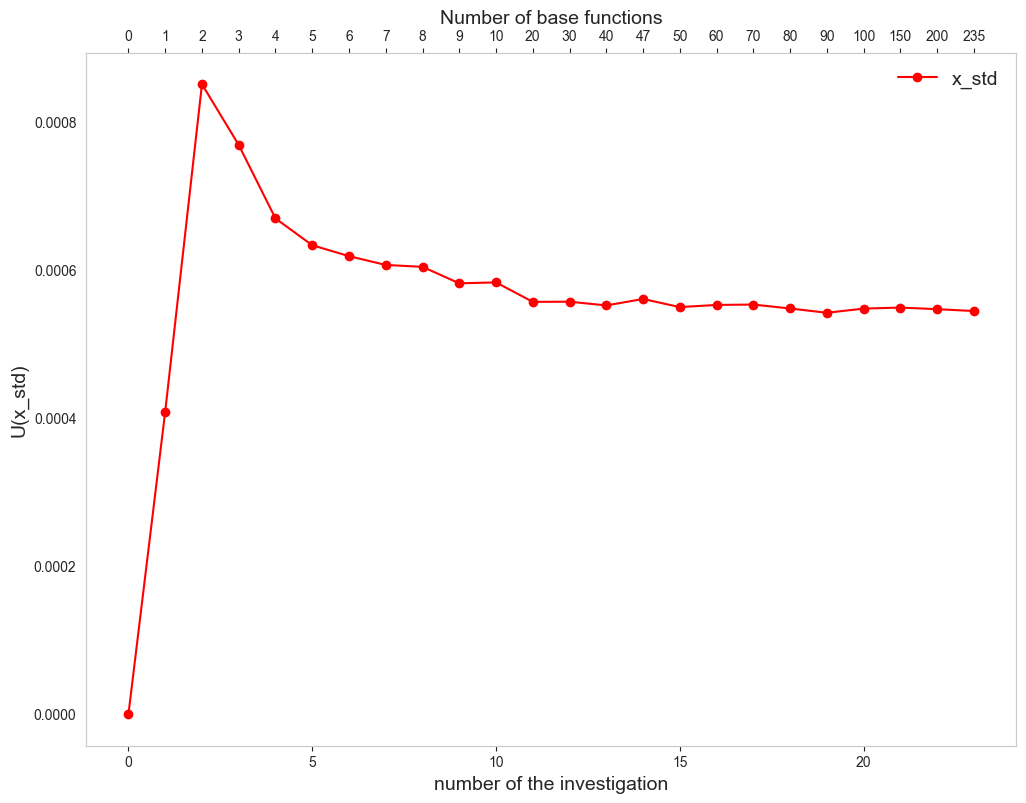

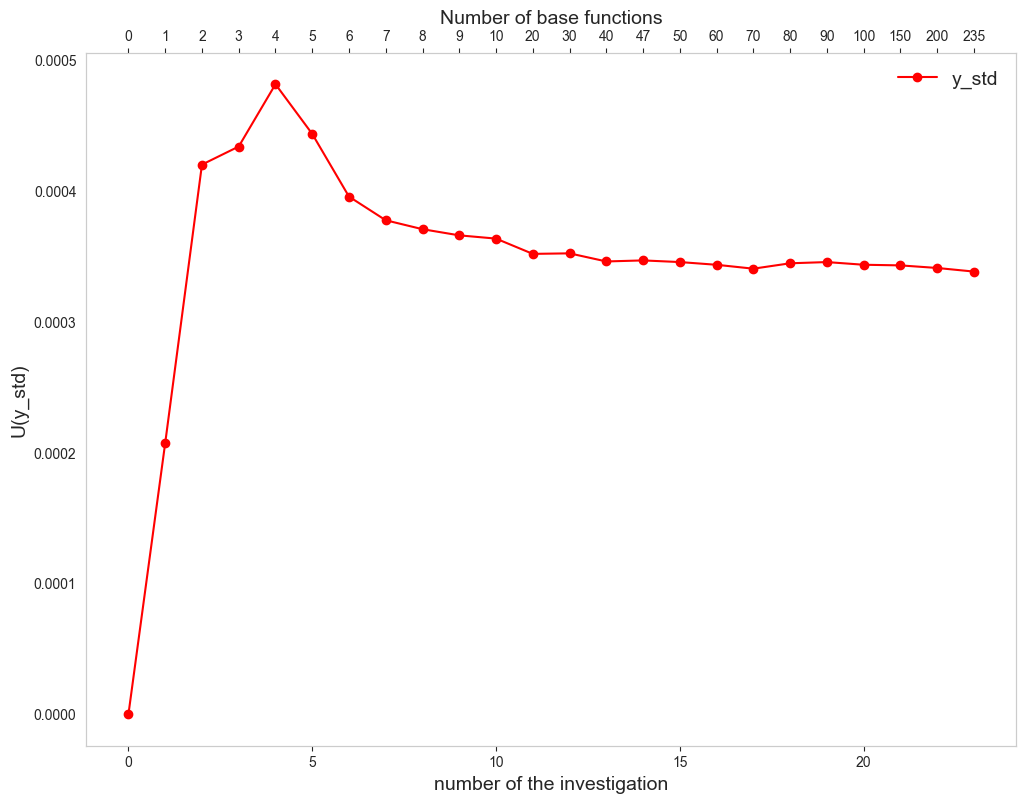

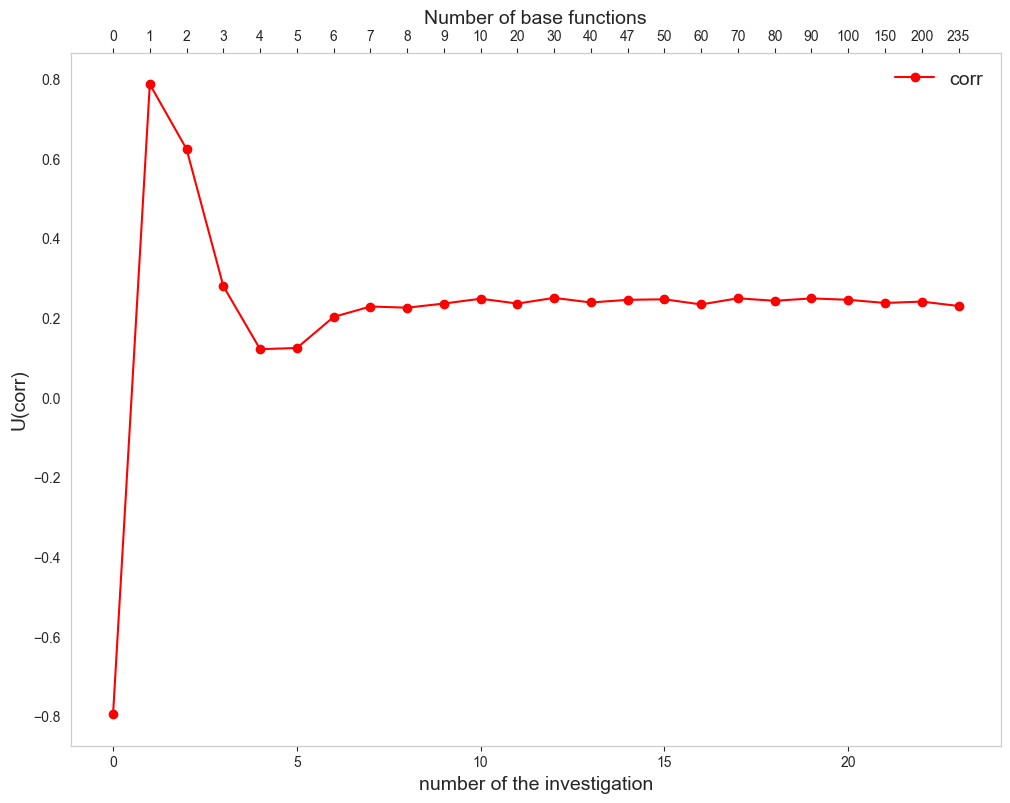

In [6]:
# Attention: standard not expanded
graphTest(dataTableColour, 'x_TableStd', _source='x_std')
graphTest(dataTableColour, 'y_TableStd', _source='y_std')
graphTest(dataTableColour, 'xy_corr', _source='corr')